## Homework 03: You will run Logistic Regression, K-Nearest Neighbor, Decision Tree, and Random Forest Classifier to predict survival for the Titanic Dataset.

## Then, you will check and print the performance of your model.

---------

#### First, get all your required packages. Note: the list below is not exhaustive, if you need more packages, please import them as needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### We are going to obtain the Titanic dataset from DataScienceDojo's github page. Thank you to them for the readily available data.

Here is the link: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Import the file as a DataFrame called `titanic`.

In [2]:
# https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **`Survived`** is your target variable, also known as your dependent variable.

## Your attributes/features/independent variables will help predict survival on the Titanic.

### But first, you need to preprocess the data.


*  Note: **`Survived`** is your target variable (**Y**).

* **`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`**, and **`Fare`** will certainly be important predictors of whether a passenger survived or not. Hence, they will be included in your attributes list (**X**).

* The **`Name`, `Ticket`**, and **`Cabin`** are not useful features. Someone's name has no bearing on whether they survive or not. Similarly, a ticket number is just a unique identifier for a passenger - it is not meaningful, ordered data. So we can drop these 3. **NOTE**: NEVER drop variables from the original dataset. Either create a new df for relevant features, or create a copy of titanic and then drop the ones you do not want.
*   Where they **`Embarked`** can be meaningful, but the data is a string variable. Let us convert it to an integer. This can be done with **`np.where`** or with **label encoding**. I will help you with this step. You have to do the rest of the preprocessing steps.






In [3]:
titanic.Embarked.unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


### Perfect! Now You can use Pclass, Sex, Age, SibSp, Parch, Fare, and embarked as your features.

Step 1: First shuffle your dataset.
Step 2: Create X and Y arrays. You can refer to the class file for this. Y is the target (single column), X comprises all the relevant features.

In [4]:
titanic = titanic.sample(frac=1, random_state=42).reset_index(drop=True)
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic_copy = titanic[features + ["Survived"]].copy()
titanic_copy.dropna(inplace=True)
titanic_copy["Sex"] = np.where(titanic_copy["Sex"] == "male", 0, 1)
titanic_copy["Embarked"] = titanic_copy["Embarked"].astype("category").cat.codes
X = titanic_copy.drop(columns=["Survived"]).values
Y = titanic_copy["Survived"].values
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (712, 7)
Shape of Y: (712,)


## 1. Logistic Regression

### Use this model to predict survival on the Titanic.    
## Part I:
### First, use a 80:20 train-test split. Run your logistic regression prediction model.  
### Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

## Part II: Repeat all the above with a 60:40 split.   

## Compare the results between Part 1 and Part 2. Which split gave you better results in your opinion?


Confusion Matrix:
[[73 14]
 [18 38]]
Accuracy: 0.7762237762237763
Precision: 0.7307692307692307
Recall: 0.6785714285714286
F1-score: 0.7037037037037037
Sensitivity: 0.6785714285714286
Specificity: 0.8390804597701149
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        87
           1       0.73      0.68      0.70        56

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.78      0.77       143



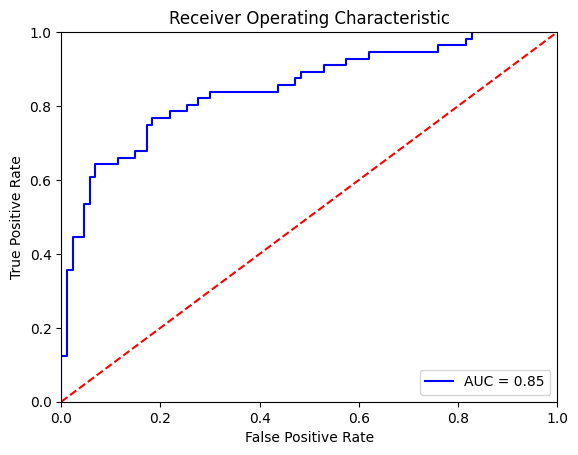

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


Y_pred = logreg.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


print(classification_report(Y_test,Y_pred))


probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix:
[[146  32]
 [ 31  76]]
Accuracy: 0.7789473684210526
Precision: 0.7037037037037037
Recall: 0.7102803738317757
F1-score: 0.7069767441860465
Sensitivity: 0.7102803738317757
Specificity: 0.8202247191011236
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       178
           1       0.70      0.71      0.71       107

    accuracy                           0.78       285
   macro avg       0.76      0.77      0.76       285
weighted avg       0.78      0.78      0.78       285



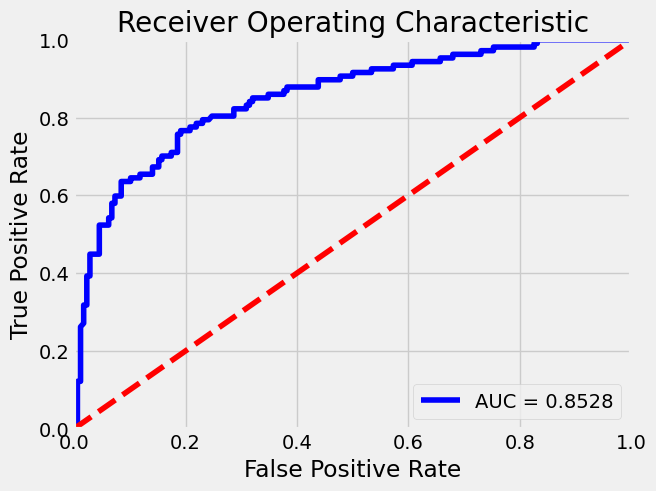

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


Y_pred = logreg.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


print(classification_report(Y_test,Y_pred))


probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Now K Nearest Neighbors:

## 2. KNN: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split. Run your KNN choosing 3 nearest neighbors.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

Part II: Repeat the above with neighbors = 5.

Compare the results between Part 1 and Part 2. Which neighbor selection gave you better results?

In [17]:
# start working here. Feel free to use several separate blocks of code.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans


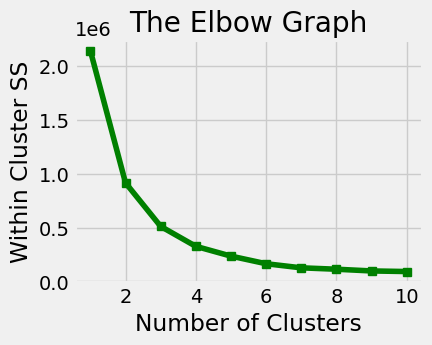

In [18]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

wcss = {}
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans.fit(X)
	wcss[i] = kmeans.inertia_

plt.figure(figsize=(4,3))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Graph')
plt.ylabel('Within Cluster SS')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [40]:
kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,

In [41]:
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)
X = titanic_copy.drop(columns=["Survived"]).values
y = titanic_copy["Survived"].values
X = X[~np.isnan(X).any(axis=1)]
y = y[:X.shape[0]]
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))



Result: 448 out of 712 samples were correctly labeled.
Accuracy score: 0.63


In [42]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [43]:
kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 4, 0, 4, 0, 2, 0, 2, 0, 4, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 2, 0, 2, 4, 2, 4,
       2, 0, 1, 4, 0, 0, 0, 0, 4, 2, 0, 0, 2, 0, 1, 0, 2, 0, 4, 0, 2, 4,
       4, 0, 0, 2, 4, 4, 2, 2, 4, 0, 0, 4, 0, 2, 4, 4, 0, 4, 0, 2, 4, 0,
       0, 4, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 2, 2, 0, 0, 4, 4, 2, 0, 0,
       2, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 2, 0,
       0, 0, 2, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 1, 4, 0, 4, 4, 0, 0,
       0, 4, 2, 1, 0, 2, 0, 4, 0, 0, 4, 0, 0, 2, 4, 1, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 1, 4, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 4, 0, 2, 0, 0, 2, 4, 0, 1, 2, 4, 0, 4, 0, 0, 2, 0, 4, 4, 1, 0,
       0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 4, 4, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 2, 4, 0, 4, 0, 0, 0, 2, 0, 2, 2, 0, 0, 4, 0, 2, 4,
       0, 2, 0, 0, 0, 4, 0, 2, 0, 2, 2, 4, 4, 4, 4,

In [44]:
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)
X = titanic_copy.drop(columns=["Survived"]).values
y = titanic_copy["Survived"].values
X = X[~np.isnan(X).any(axis=1)]
y = y[:X.shape[0]]
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 442 out of 712 samples were correctly labeled.
Accuracy score: 0.62


In [45]:
# convert Sex to 1 and 0 where 1 is female
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked']]
y = titanic['Survived']

The accuracy was slightly higher with the 3 nearest neighbors

## Finally, Tree-Methods:

## 3. Decision Tree: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. **Plot** the ROC curve.

Part II: Repeat the above with a 50:50 train test split.

Compare the results between Part 1 and Part 2. Which split gave you better results?

Try a Random Forest Classifier as well. Works very similarly to how a decision tree does.

Confusion Matrix:
[[70 17]
 [18 38]]
Accuracy: 0.7552447552447552
Precision: 0.6909090909090909
Recall: 0.6785714285714286
F1-score: 0.6846846846846847
Sensitivity: 0.6785714285714286
Specificity: 0.8045977011494253
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.69      0.68      0.68        56

    accuracy                           0.76       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



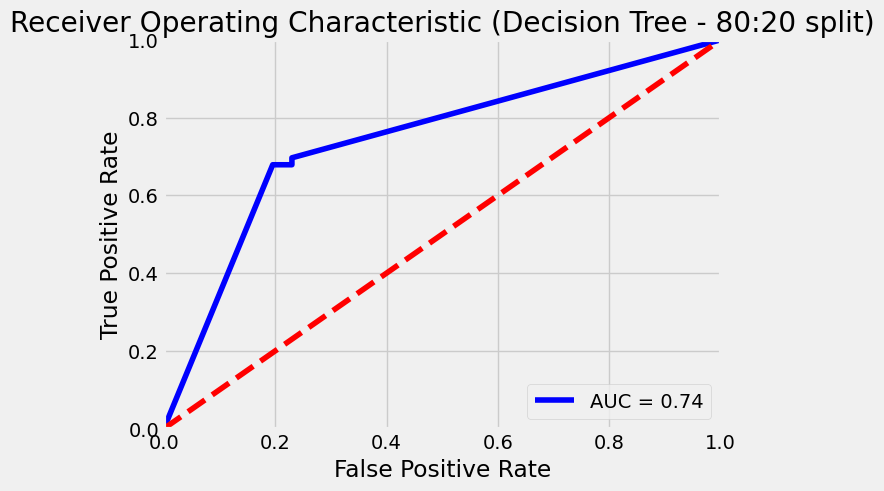

In [33]:
X = titanic_copy.drop(columns=["Survived"]).values
Y = titanic_copy["Survived"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(Y_test, Y_pred))

probs = decision_tree.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (Decision Tree - 80:20 split)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

Confusion Matrix:
[[167  53]
 [ 37  99]]
Accuracy: 0.7471910112359551
Precision: 0.6513157894736842
Recall: 0.7279411764705882
F1-score: 0.6875
Sensitivity: 0.7279411764705882
Specificity: 0.759090909090909
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       220
           1       0.65      0.73      0.69       136

    accuracy                           0.75       356
   macro avg       0.73      0.74      0.74       356
weighted avg       0.75      0.75      0.75       356



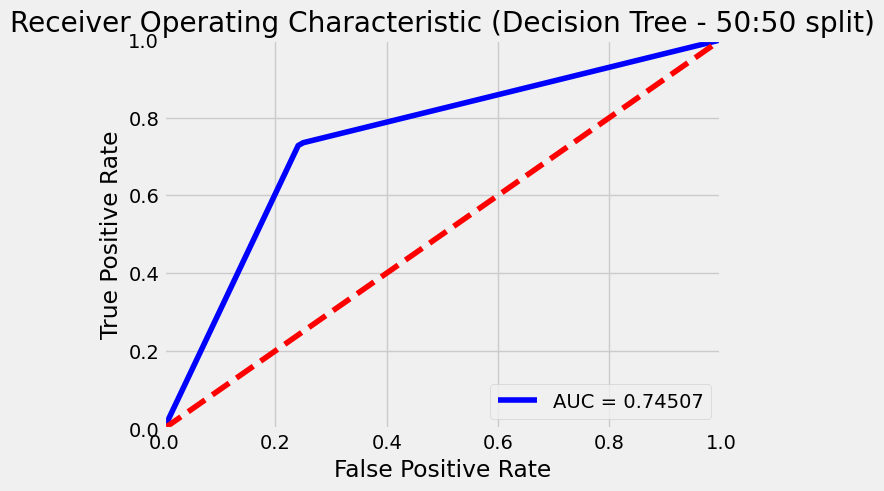

In [35]:
X = titanic_copy.drop(columns=["Survived"]).values
Y = titanic_copy["Survived"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(Y_test, Y_pred))

probs = decision_tree.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (Decision Tree - 50:50 split)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

The results are fairly similar, however I will say the accuracy was a bit higher for the 80:20 split.

Confusion Matrix:
[[179  41]
 [ 37  99]]
Accuracy: 0.7808988764044944
Precision: 0.7071428571428572
Recall: 0.7279411764705882
F1-score: 0.717391304347826
Sensitivity: 0.7279411764705882
Specificity: 0.8136363636363636
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       220
           1       0.71      0.73      0.72       136

    accuracy                           0.78       356
   macro avg       0.77      0.77      0.77       356
weighted avg       0.78      0.78      0.78       356



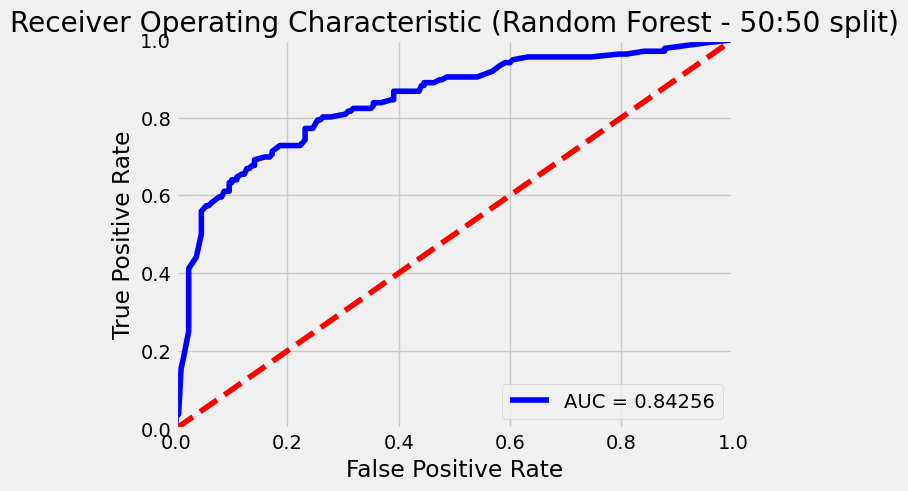

In [38]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

forest_classifier = RandomForestClassifier(random_state=42) # You can adjust hyperparameters here
forest_classifier.fit(X_train, Y_train)
Y_pred = forest_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(Y_test, Y_pred))

probs = forest_classifier.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (Random Forest - 50:50 split)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()